# Model Calibration

We can consider a scenario in which we want to price an exotic option that is not currently traded in the market. We would follow the below diagram:

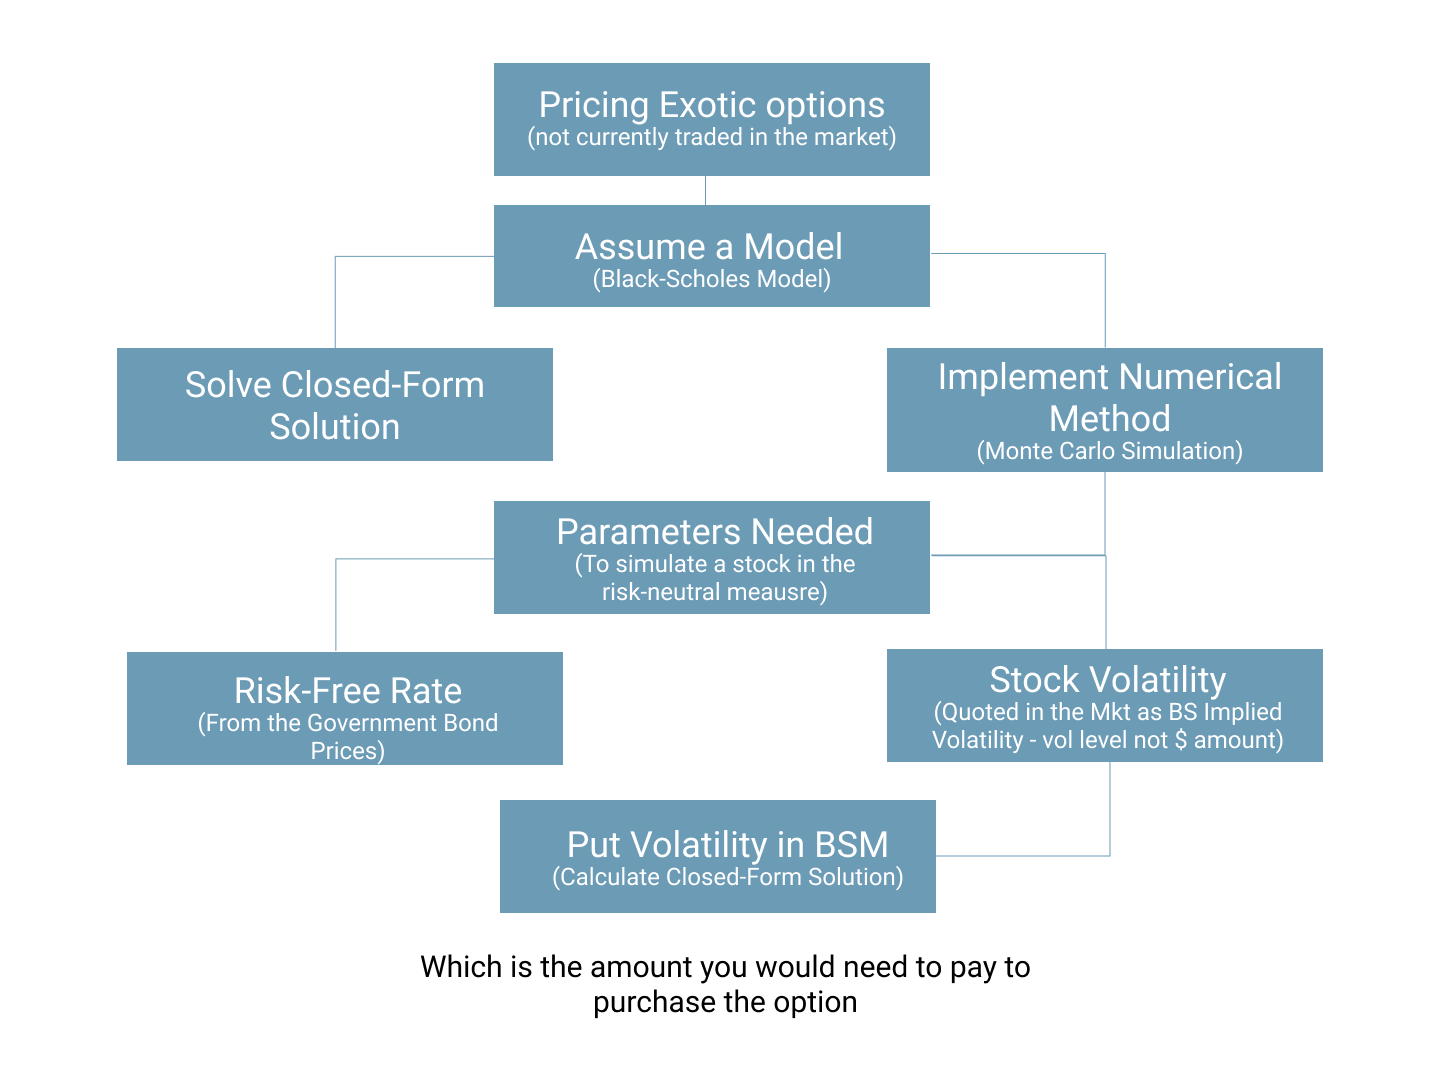

##### Assumption:

We can assume that we can see the price itself instead of the volatility

## Calibration

One way of estimating the volatility is to set it so that our model prices are **as close as possible** to market prices which we can observe.

This is known as **calibration** i.e. the setting of parameter values in a model to **match target values** (which will often be market prices in this case)

##### Calibration vs Estimation

- **Estimation** is the process of using a **time series of historical data** to find the parameter values (e.g. a long-term mean)



- **Calibration** requires only a single time point's information and fitting the model best to that information. It is about finding an agreement between the various theoretical aspects of quantitative modeling, and the practical aspects like the prices observed in the market.

#### Delta-Hedging Example

Delta-hedging is the process whereby a holding equal to the negative of the delta of a derivative in the underlying  is held in conjunction with the derivative.

- Leads to the portfolio as a whole being **immunized to small changes in the underlying'price**

In order to achieve such a goal we need to have a measurement of the underlying's delta (using the model used for the underlying)

- An **uncalibrated or poorly calibrated model** will give an incorrect delta value

    - This leads to the portfolio not being correctly delta-hedged
    
    
- If a portfolio is **under-hedged** you would not be protecetd fully against changed in the underlying's value


- If a portfolio is **over-hedged** you will tie up unnecessary capital in your hedging portfolio


Any instruments that are used for hedging need **need to be calibrated correctly to the market**.

## Calibration under Black-Scholes Model

**Cannot find Closed-Form** without knowing the **stock's volatility**

### Price of a Call Option

$$ C = \phi(d_{1_C})S_0 - \phi(d_{2_C})K_C e^{-rT_C} $$

Where $\phi(.)$ is the cdf of a standard normal random variable

$$ d_1 = \frac{1}{\sigma \sqrt T_C}(\ln \frac{S_0}{K_C} + (r + \frac{\sigma^2}{2})T_C) $$
$$ d_2 = d_1 - \sigma \sqrt T_C $$

**Cannot find Closed-Form** without knowing the **stock's volatility**

In [1]:
import numpy as np
from scipy.stats import norm
import scipy.optimize

In [2]:
# Setting the variables

r = 0.1
S0 = 100
K = 110
T = 2
KC = 95
TC = 1
price = 15

In [8]:
# Function for call options

## as a function of volatility
def d_1c(x):
    return 1/(x*np.sqrt(TC))*(np.log(S0/KC)+(r+x**2/2)*TC)

def d_2c(x):
    return d_1c(x) - x*np.sqrt(TC)

def C(x):
    return norm.cdf(d_1c(x))*S0 - norm.cdf(d_2c(x))*KC*np.exp(-r*TC)

## finds the difference bewteen the call price for a given volatility and the price observed in the market
## if calibration is done successfully this difference should be small
def F(x):
    return C(x) - price

**Broyden Method** of optimization is used too find the value of $\sigma$ for which $F(\sigma) = 0$

Where we call `.optimize.broyden1(Function for which we want to find the root, guess)`

This will allow us to find our calibrated $\sigma$

In [9]:
# Solving for sigma
sigma = scipy.optimize.broyden1(F, 0.2)
sigma

array(0.14172599)

### Price of a Put Option

$$ P = \phi(-d_2)Ke^{-rT} - \phi(d_1)S_0 $$

Where $\phi(.)$ is the cdf of a standard normal random variable

$$ d_1 = \frac{1}{\sigma \sqrt T}(\ln \frac{S_0}{K} + (r + \frac{\sigma^2}{2})T) $$
$$ d_2 = d_1 - \sigma \sqrt T $$

In [10]:
# Function for put options

## as a function of volatility
def d_1(x):
    return 1/(x*np.sqrt(T))*(np.log(S0/K)+(r+x**2/2)*T)

def d_2(x):
    return d_1(x) - x*np.sqrt(T)

def P(x):
    return -norm.cdf(-d_1(x))*S0 + norm.cdf(-d_2(x))*K*np.exp(-r*T)

## finds the difference bewteen the call price for a given volatility and the price observed in the market
## if calibration is done successfully this difference should be small
def F(x):
    return P(x) - price

put_price = P(sigma)
put_price

3.623514098011679

# 2. Error Analysis

There is an error inherent in every model we use. The aim is to strike a balance between a model being tractable and accurate (goals which are often in opposition to each other).

## Sources of Error in Models

### 1. Model Error

This error comes from the model itself being unable to fully capturea financial instrument's characteristic.

For Example: **Model the Short Rate in a Market** whose dynamics are of the form:

$$ dr(t) = \mu(t,r(t))dt + \sigma(t,r(t))dW_t $$

where the drift and variance are not necessarily deterministic functions and can be stochastic as $W_t$ is a multidimensional Brownian Motion.

**If we were to model the short rate using the Vasicek Model:**

$$ dr(t) = \hat{\mu}(t,r(t))dt + \hat{\sigma}(t,r(t))dW_t, r(0) = r$$

where,

$\hat{\mu}(t,r(t)) = \alpha(\beta - r(t))$

$\hat{\sigma}(t,r(t))$ is a constant

$W_t$ is a one-dimensional Brownian Motion

#### Problem:

We are trying to model two potentially **stochastic functions** using **a deterministic function and a constant**. This is going to resultin a **significant error** over timie.

#### Solution:

We could use a model which assumes more complex dynamics for the short rate, but this would come at the expense of the extent to which we can interpret the parameters in the model, and whether the model gives closed-form solutions to the prices of various market instruments.

### 2. Data Error

The next source of error comes from the data itself. 

- The quality of market data will have a direct impact on the accuracy of the model used. 


- This isn’t necessarily a problem in a **sufficiently sophisticated financial market**. 


- However, in the case of **emerging markets**: data quality will likely be a major consideration that you will have to account for when trying to implement a model in the market.


- **Number of Sources of Noise in the Data:** Another possible issue with the data that you use to calibrate a model is the number of sources of noise in the data. 

The Vasicek model used above **doesn’t allow for any drastic market movements** whatsoever. 

Suppose that there is a sudden change in the short rate (which is entirely possible). The Vasicek model would not be able to account for this. This means that, if we use the data with these sudden changes in it to calibrate the model, we may get an inappropriate calibration (and subsequent error).

### 3. Strengths and Weaknesses of Models

#### a. Black-Scholes Model

- **Advantage:** is its ease of use, and ubiquity – vanilla options quoted in terms of Black-Scholes implied volatility, giving an indication of the extent to which it permeates the financial sector. 



- **Disadvantages:** this tractability is as a result of the numerous assumptions made in the model, most of which are empirically wrong. 

    - risk-free yields curves are almost never flat; 
    
    - trading costs are always incurred in reality;
    
    - fractional holdings of assets are usually impossible. 
    
    
As a result of these incorrect assumptions, the Black-Scholes model cannot be calibrated well to the market. 


This is most apparent in the **volatility smile**, where vanilla options of different strikes have a different Black-Scholes implied volatility. 

Since we assume a constant volatility for any given stock, it is impossible to fit our Black-Scholes model to all of the market-observed prices concurrently. 

Since the Black-Scholes model is **ultimately a particularly inaccurate model**, other, more extensive models were developed. 

**Hedging Argument:** Black- Scholes model can still work relatively well empirically for hedging, and its importance in the market cannot be overstated.


#### b. Constant Elasticity of Variance Model

The constant elasticity of variance (CEV) model offers a simple extension to the Black-Scholes by
expressing the **diffusion coefficient** in the stochastic differential equation (SDE) of a stock price
process as:

$$\sigma S_t^{\gamma}$$

instead of 

$$\sigma S_t$$

However,according to Ballestra(2011), this model cannot be calibrated in a way which correctly prices
equity options.

#### c. Heston Model

The Heston model differs from Black-Scholes in its diffusion coefficient for the stock price process SDE.

In the Heston model, this **diffusion coefficient is stochastic**. 

According to Mikhailov (2004), this offers an improvement over Black-Scholes by capturing important observed characteristics like **non-lognormal asset returns** and **mean-reverting volatility**. 

In terms of calibration, they state “the Black-Scholes volatility surfaces generated by Heston’s model look like empirical implied volatility surfaces”. In other words, this model offers a better calibration option than Black-Scholes. 

The drawback is that one cannot construct a portfolio which is perfectly risk-free since the **stochastic volatility cannot be traded directly**.

#### d. Short-Term Rate Models

The **Vasicek model** is unable to calibrate perfectly to certain yield curves. 

This can be improved using the **Hull-White model**, which allows the mean-reversion level of the short-term rate to vary over time. Thus, one can calibrate one’s mean-reversion function so as to capture market observed bond prices.


#### f. Libor Forward Market Model

- **Advantage:** it is automatically calibrated. This is because the initial forward rates are set at the market forward rates – a directly observable quantity.

# 3. Interest Rate Model Calibration

## Calibrating the Vasicek Interest Rate Model

When it comes to calibrating interest rate models, the **yield curve** is usually used.

### 1. Bootstrapping a Yield Curve

We can use the ZCB prices and other instruments with various maturities to boostrap a yield curve, which means utilizing the prices for maturities which we can observe and implying the prices for the maturities which we do not know.

Suppose that our yield curve for maturities from 1 to 10 years takes the form:

$$y(t) = \frac{1}{75}\sqrt[5]{t} + 0.04$$

where,

$y(t)$ is the yield for a bond with maturity time t.

We will:

- Find the bond prices with maturities 1,2,3,..., 10 years (no fractional years)


- Calibrating the model using these prices


- Compare the calibrated model prices to the non integer year maturity prices

In [15]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.optimize

In [19]:
# creating a yield curve for integer maturities

years = np.linspace(1,10,10)
yield_curve = (years)**(1/5)/75 + 0.04
bond_prices = np.exp(-yield_curve*years)

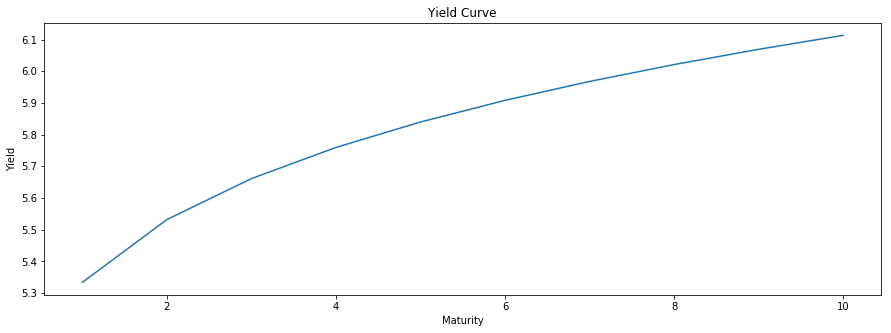

In [20]:
# plotting the yield curve
plt.figure(figsize=(15,5))
plt.plot(years, yield_curve*100)
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curve")
plt.show()

### 2. Calibrating the Interest Rate Model

Under the **Vasicek Model** the short rate is defined by the SDE:

$$ dr_t = \alpha(b - r_t)dt + \sigma dW_t, r_0 = r(0) $$

Where we can assume that we can observe the current short rate $r_0$ leaving us with $\alpha, b, \sigma$ to calibrate.

#### Bond Price at Time t with Maturity T

$$ B(t,T) = e^{-A(t,T)r_t +D(t,T)} $$

where,

$$A(t,T) = \frac{1-e^{-\alpha(T-t)}}{\alpha} $$

$$D(t,T) = (b - \frac{\sigma^2}{2 \alpha^2})[A(t,T) - (T-t)] - \frac{\sigma^2 A(t,T)^2}{4 \alpha}$$

In order to calibrate our model:

- we are going to create functions for A,D and B that take t, T, a, b and sigma as parameters


- then **minimize** the difference bewteen the bond prices implied by the Vasicek SDE and the bond prices given by our yield curve.

**N.B.**  Note that we are optimizing over three variables, but it is essentially 10 equations which we are trying to set to 0. This means that it is unlikely that we will be able to calibrate our model perfectly.

In [27]:
# Analytical Bond price
def A(t1, t2, alpha):
    return (1-np.exp(-alpha*(t2-t1)))/alpha

def D(t1, t2, alpha, b, sigma):
    val_1 = (t2-t1-A(t1,t2, alpha))*(sigma**2/(2*alpha**2)-b)
    val_2 = sigma**2*A(t1,t2, alpha)**2/(4*alpha)
    return val_1 - val_2

def bond_price(r,t,T, alpha, b, sigma):
    return np.exp(-A(t,T, alpha)*r + D(t,T, alpha, b, sigma))

r0 = 0.05

# difference bewteen model bond prices and yield curve bond prices
def F(x):
    alpha = x[0]
    b = x[1]
    sigma = [2]
    return sum(np.abs(bond_price(r0,0,years,alpha,b,sigma)-bond_prices))

#### Minimize F

In order to minimize F, we neet the `scipy.optimize.fmin_slsqp` routine which minimizes a function which returns a scalar, over some vector input.

This routine allows one to supply **lower and upper bounds** for each variable which we are optimizing over.

It ensures that we do not have a case where volatility is negative.

##### Variable Bounds

- The first typle in bounds is th elower and upper bounds for `x[0]`:

$$ 0 \leq \alpha \leq 1 $$

- The second pair of tuple are the lower and upper bounds for `x[1]`

$$ 0 \leq b \leq 0.2 $$

- The second pair of tuple are the lower and upper bounds for `x[1]`

$$ 0 \leq \sigma \leq 0.2 $$

The lower bounds are all 0, since negative values would not make sense for these variables.

For instance, it is unlikely that the long-term mean short-term rate would exceed 20%, and so that is our upper bound for 𝑏.

In [ ]:
# Minimizing F

bnds = ((0,1), (0,0.2), (0,0.2))
opt_value = scipy.optimize.fmin_slsqp(F, (0.3, 0.05, 0.03), bounds=bnds) # initial guess is the middle part
opt_alpha = opt_val[0]
opt_b = opt_val[1]
opt_sig = opt_val[2]


As an inputs to the function scipy.optimize.fmin_slsqp, we provided the function to be minimized (𝐹), an initial guess (α = 0.3, 𝑏 = 0.05, σ = 0.03), and the bounds for these variables
being optimized over. Note that the initial guess should be within the magnitude that you expect values to be. In some cases, it may be necessary to rerun the algorithm with a number of different initial guesses and bounds, to find a good fit. But this needs to be balanced with realism in the calibrated parameters that the algorithm kicks out e.g. a 𝑏 value of 200% may provide a good fit, but it is wholly unrealistic.


In [ ]:
# Calculating model prices and yield
model_prices = bond_price(r0,0,years,opt_alpha,opt_b,opt_sig)
model_yield = -np.log(model_prices)/years

# plotting the market vs model prices
plt.plot(years, bond_prices)
plt.plot(years,model_prices, ".")

# plotting the market vs model yields
plt.plot(years, yield_curve*100)
plt.plot(years, model_yield * 100, "x")

plt.show()

#### Using Similar Maturities Only

The yield curve, that the model yield appears to fit the market yields closer for the longer maturities.

If you are calibrating a model to price a certain portfolio or derivative, and you know the maturity time of that portfolio, you might only use market values with similar maturity values as your derivative to calibrate your model.

##### Disadvantage:

- Calibrating the model for certain maturities only: might make it seem like the model replicates the market well, when in reality it only matches well **with those maturities**.(if model holds for these maturities only it could work but it would change any closed-form solution we are working on.

- Calibrating a model to **all maturities** for which we have prices can potentially identify issues with the models we are using.

Always keep in mind that instruments with which you are hedging and pricing need to be calibrated.

### Recap of Procedures Used:

In order to Calibrate the Vasicek Model, we used a procedure that will be similar for any model calibration for which we have a **closed-form solution**.

- **1. Identify:** variables for which we need to calibrate


- **2. Collect:** market prices of instruments which rely on these variables


- **3. Minimize:** the difference between market values and model values


In this case, we minimized the absolute differences, and weighted all maturities equally (weights can also be changed, making later maturities more heavy but it comes with same risks as using only certain maturities).

# 4. Pricing Options with Monte Carlo

## Using Characteristic Function Pricing Techniques to Calibrate Models

- **Applicability to Models:** there are many models which have closed-form characteristic functions but do not have closed-form prices for even vanilla options (i.e. The Heston Model)


- **Efficiency of Fourier Techniques in Evaluating Option Prices:** When we are calibrating our models using market data, what we are essentially doing is *guessing* values for whatever parameter values that we are trying to estimate, substituting this into the pricing formula, and seeing which guesses get our model prices closest to the market prices.

**Goal:** is to find parameter values that minimize the difference between the market price and our model price.

Because we are guessing values and checking how close this is to the market value, we will be doing many evaluations of our pricing function. If we are trying to calibrate several parameters, this can result in our need to make several thousands of function evaluations (and possibly even more). As a result, being able to efficiently price a market instrument will result in an efficient calibration process.

## Calibrating the Heston Model using Gil-Pelaez

The Heston models assumes assets follow these dynamics:

$$ dS_t = \mu Sdt + \sqrt{\upsilon_t}SdW_t^1 $$

$\upsilon_t$ follows a CIR or square-root process:

$$ d \sqrt{\upsilon_t} = -\beta \sqrt{\upsilon_t}dt + \sigma d W_t^2 $$

Appying Ito's Formuls yields:

$$ d \upsilon_t = \kappa(\theta - \upsilon_t)dt + \sigma \sqrt{\upsilon_t}dW^2_t$$

Where $W_t^2$ is a standard Brownian Motion and has correlation $\rho$ with $W_t^1$.


### Characteristic Function of S

This was proposed by Albrecher et al. (2007). We will use this rather than the original as this version is numerically more stable.

Let $s_t = log(S_t)$

$$ \phi_{s_T} = e^{C(\tau,u) + D(\tau;u)\upsilon_t + iu\log(S_t))} $$

Where, 

$$ C(\tau;u) = ri\tau u + \theta \kappa [\tau x_{-} - \frac{1}{a}\log (\frac{1-ge^{d \tau}}{1-g})] $$

$$ D(\tau;u) = (\frac{1-e^{d \tau}}{1-g e^{d \tau}})x_-$$

And

$\tau = T-t$

$g = \frac{x_-}{x_+}$

$x_{\pm} = \frac{b \pm d}{2a}$

$d = \sqrt{b^2 - 4ac}$

$c = - \frac{u^2 + ui}{2}$

$b = \kappa - \rho \sigma i u$

$a = \frac{\sigma^2}{2}$

### Option Pricing using Gil-Pelaez

We can write the price of a vanilla call option as:

$$ c = S_0 Q^S[S_T > K] - e^{-rT}KQ[S_T > K] $$

$$ = S_0(\frac{1}{2} + \frac{1}{\pi} \int_0^{\infty}\frac{Im[e^{-it\ln K}\varphi_{M_2}(t)]}{t}dt) -e^{-rT}K(\frac{1}{2} + \frac{1}{\pi} \int_0^{\infty}\frac{Im[e^{-it\ln K}\varphi_{M_1}(t)]}{t}dt) $$

Where, 

$$ \varphi_{M_1}(t) = \phi_{s_T}(t) $$


$$ \varphi_{M_1}(t) = \frac{\phi_{s_T}(u-i)}{\phi_{s_T}(-i)} $$

### Calibrating the Heston Model in Python

We can take $\rho, r$ as being given, so we can look at how we can calibrate $\kappa, \theta, \sigma$. Since we are trying to calibrate 3 parameters, we need at least 3 data points.

In [32]:
import numpy as np
from scipy.stats import norm
import scipy.optimize as opt
import matplotlib.pyplot as plt

We have the strikes, and market prices of 3 call options all with a maturity of 1 year.

In [34]:
# initialize parameters

r = 0.06
S0 = 100

## current share variance
v0 = 0.06

K = np.array([110,100,90])
price = [8.02, 12,63, 18.72]
T = 1
k_log = np.log(K)

## adjust the log-strike so that it is a column vector (helpful to vectorize code)
k_log.shape = (3,1)

## correlation between the share price and its variance process
rho = -0.4

# paramters for Gil-Pelaez
t_max = 30 # effective upper bound of integration
N = 100 # number of intervals for our integration

Each function takes in as inpout `u` as well as the parameters we are trying to calibrate.

In [41]:
# Characteristic function code

def a(sigma):
    return sigma**2/2

def b(u, theta, kappa, sigma):
    return kappa - rho*sigma*1j*u

def c(u, theta, kappa, sigma):
    return -(u**2+1j*u)/2

def d(u, theta, kappa, sigma):
    return np.sqrt(b(u, theta, kappa, sigma)**2-4*a(sigma)*c(u, theta, kappa, sigma))

def xminus(u, theta, kappa, sigma):
    return (b(u, theta, kappa, sigma) - d(u, theta, kappa, sigma))/(2*a(sigma))

def xplus(u, theta, kappa, sigma):
    return (b(u, theta, kappa, sigma) + d(u, theta, kappa, sigma))/(2*a(sigma))

def g(u, theta, kappa, sigma):
    return xminus(u, theta, kappa, sigma)/xplus(u, theta, kappa, sigma)

def C(u, theta, kappa, sigma):
    val_1 = T*xminus(u, theta, kappa, sigma) -np.log((1-g(u, theta, kappa, sigma)*np.exp(-T*d(u, theta, kappa, sigma)))/(1-g(u, theta, kappa, sigma)))/a(sigma)
    return r*T*1j*u + theta*kappa*val_1

def D(u, theta, kappa, sigma):
    val_1 = 1-np.exp(-T*d(u, theta, kappa, sigma))
    val_2 = 1-g(u, theta, kappa, sigma)*np.exp(-T*d(u, theta, kappa, sigma))
    return (val_1/val_2)*xminus(u, theta, kappa, sigma)

# M1
def log_char(u, theta, kappa, sigma):
    return np.exp(C(u, theta, kappa, sigma) + D(u, theta, kappa, sigma)*v0 + 1j*u*np.log(S0))

# M2
def adj_char(u, theta, kappa, sigma):
    return log_char(u-1j, theta, kappa, sigma)/log_char(-1j, theta, kappa, sigma)

In [42]:
delta_t = t_max/N
from_1_to_N = np.linspace(1,N,N)
t_n = (from_1_to_N-1/2)*delta_t

In [49]:
# Given that we have three strikes, it will return a 1x3 array.
def Hest_Pricer(x):
    theta = x[0]
    kappa = x[1]
    sigma = x[2]
    first_integral = np.sum((((np.exp(-1j*t_n*k_log)*adj_char(t_n, theta, kappa, sigma)).imag)/t_n)*delta_t, axis=1)
    second_integral = np.sum((((np.exp(-1j*t_n*k_log)*log_char(t_n, theta, kappa, sigma)).imag)/t_n)*delta_t, axis=1)
    fourier_call_value = S0*(1/2 + first_integral/np.pi) - np.exp(-r*T)*K*(1/2 + second_integral/np.pi)
    return fourier_call_value

def opt_func(x):
    """
    returns the sum of the absolute differences between
    our estimated price (for each parameter guess) and
    the actual market prices. Thus, it will return a single value. 
    """
    return sum(np.abs(price - Hest_Pricer(x)))

In [ ]:
# Calibrating the model
opt_val = opt.fmin_slsqp(opt_func, (0.1, 3, 0.1))

## Calibrating using FFT pricing

Using the FFT for calibration has several pros and cons. The benefit is that the algorithm for calculating the call values is extremely efficient and allows us to calculate the prices of options for a range of strikes all at once. 

However, the FFT method requires the use of a fixed grid of log- strike values. As a result, it will also calculate option prices which aren’t relevant to the available data. 

As a result, you will likely be forced to use interpolation to find the call price corresponding to specific strike values. Despite this, the FFT with interpolation is still generally more efficient than other calibration methods.


Because of this, it is sometimes inappropriate to use the FFT directly for calibration. When using this method, you will need to balance the additional efficiency against any potential loss in accuracy as a result of any interpolation used.